In [258]:
#importing all necessary modules
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [259]:
#uploading csv file chosen from kaggle dataset ('heart.csv')
df = pd.read_csv('heart.csv')

In [260]:
#inormalder to see the loaded data following command is used which shows top 5 rows 
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [261]:
#following command shows last 5 rows from the dataset.
df.tail()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0
302,57,0,1,130,236,0,0,174,0,0.0,1,1,2,0


In [262]:
#for checking the minimum-value,maximum-value,mean,standard-deviation,count,25%,50%,75% of the whole dataset in a go.
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [263]:
# now let's check for any null value present in the dataset
df.isnull().sum()

age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

**No null value is present**

### Let's analyze all the columns using EDA(Exploratory Data Analysis) ###

In [264]:
# starting with age column,inormalder to count the frequecy of unique ages,following command is used.
df.age.value_counts()

58    19
57    17
54    16
59    14
52    13
51    12
62    11
44    11
60    11
56    11
64    10
41    10
63     9
67     9
55     8
45     8
42     8
53     8
61     8
65     8
43     8
66     7
50     7
48     7
46     7
49     5
47     5
39     4
35     4
68     4
70     4
40     3
71     3
69     3
38     3
34     2
37     2
77     1
76     1
74     1
29     1
Name: age, dtype: int64

In [265]:
# age ranges from 29 to 77 and to visualize it easily let's create 3 different age-groups (young_age,middle_age,old_age). 
young_age = df[(df.age >= 29)&(df.age <40)]
middle_age = df[(df.age >= 41)&(df.age <54)]
old_age = df[(df.age >=55)]
print('young_age',len(young_age))
print('middle_age',len(middle_age))
print('old_age',len(old_age))

young_age 16
middle_age 109
old_age 159


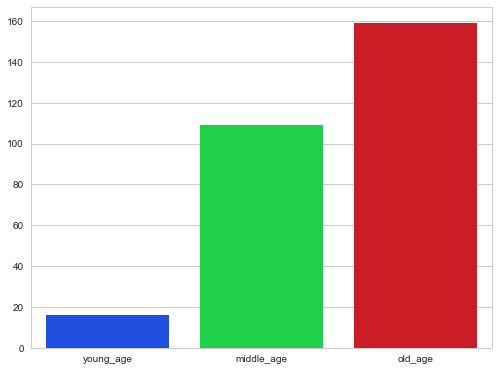

In [266]:
#plotting 3 age-groups with their count
sns.barplot(x=['young_age','middle_age','old_age'],y=[len(young_age),len(middle_age),len(old_age)])

**This plot shows highest number of people in old_age-group.**

In [267]:
#frequecy for sex
df.sex.value_counts()

1    207
0     96
Name: sex, dtype: int64

*1--male*
*0--female*

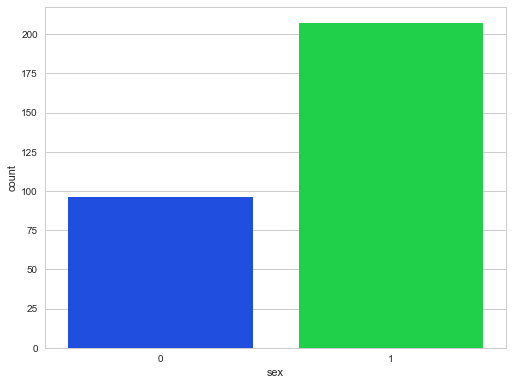

In [268]:
#graphical representation for sex column.
sns.set_style('whitegrid')
sns.countplot(x=df['sex'])

In [269]:
#let's check target frequency
df.target.value_counts()

1    165
0    138
Name: target, dtype: int64

*1--have disease,0--no disease*

In [270]:
#We should now check the % of affected male ande females.
total_gender_count = len(df.sex)
female_count = len(df[df.sex==0])
male_count = len(df[df.sex ==1])


In [271]:
total_male = len(df[(df['sex'] == 1)&(df['target'] ==1)])
total_female = len(df[(df['sex'] == 0)&(df['target'] ==1)])
total_male_not_aff = len(df[(df['sex'] == 1)&(df['target'] ==0)])
total_female_not_aff = len(df[(df['sex'] == 0)&(df['target'] ==0)])
print(total_male,total_female)
print('% of male affected {:.2f}%'.format((total_male/male_count)*100))
print('% of female affected {:.2f}%'.format((total_female/female_count)*100))
print('% of male not affected {:.2f}%'.format((total_male_not_aff/male_count)*100))
print('% of female not affected {:.2f}%'.format((total_female_not_aff/female_count)*100))

93 72
% of male affected 44.93%
% of female affected 75.00%
% of male not affected 55.07%
% of female not affected 25.00%


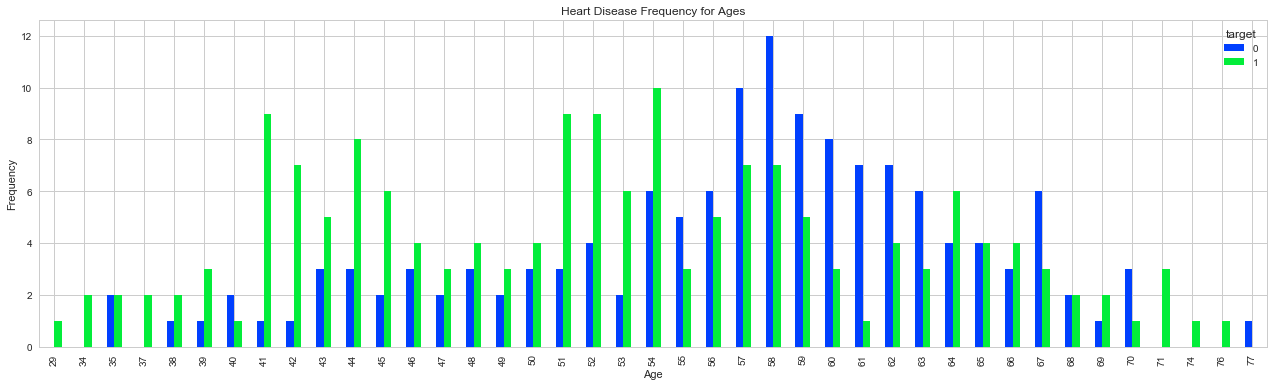

In [272]:
#plotting the affected and non-affected perons according to the age.
pd.crosstab(df.age,df.target).plot(kind="bar",figsize=(22,6))
plt.title('Heart Disease Frequency for Ages')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

*from this plot,there is more risk of heart disease in young_age,middle_age-grops than in old-age.<br>
*this plot tells us that persons in age 54 has highest frequency of affected people  

In [273]:
#Chest-pain(cp) analysis
df.cp.value_counts()

0    143
2     87
1     50
3     23
Name: cp, dtype: int64

*0 -- least<br>*
*1 -- slightly distressed condition<br>*
*3 -- medium condition<br>*
*4 -- bad condition*

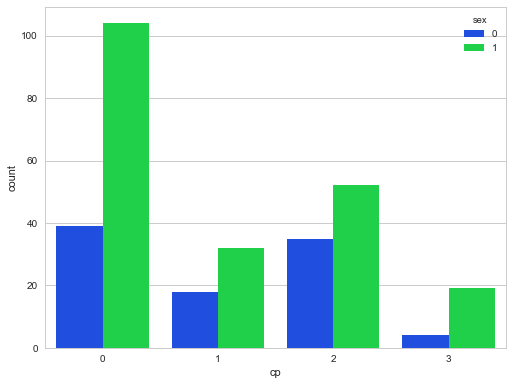

In [274]:
#Now we should check the chest-pain in both males and females.
sns.countplot(x='cp',data=df,hue='sex')

*This plot shows less number of people suffers from chest-pain*

In [275]:
#Resting-blood-pressure(in mm of Hg)
df.trestbps.value_counts()

120    37
130    36
140    32
110    19
150    17
138    13
128    12
125    11
160    11
112     9
132     8
118     7
135     6
108     6
124     6
145     5
134     5
152     5
122     4
170     4
100     4
142     3
115     3
136     3
105     3
180     3
126     3
102     2
94      2
144     2
178     2
146     2
148     2
129     1
165     1
101     1
174     1
104     1
172     1
106     1
156     1
164     1
192     1
114     1
155     1
117     1
154     1
123     1
200     1
Name: trestbps, dtype: int64

In [276]:
#To visualize and categorize normal and abnormal trestbps among male and female,2-categories are made 
#according to medical- standards.
#normal bps = 94-140
#abnormal bps = >140
male_normal = df[(df.trestbps>94 )&(df.trestbps<=140)&(df.sex==1)]
female_normal = df[(df.trestbps>94 )&(df.trestbps<=140)&(df.sex==0)]
male_abnormal = df[(df.trestbps>141 )&(df.trestbps<=200)&(df.sex==1)]
female_abnormal = df[(df.trestbps>141 )&(df.trestbps<=200)&(df.sex==0)]
print("male_normal:",len(male_normal))
print('female_normal:',len(female_normal))
print('male_abnormal:',len(male_abnormal))
print('female_abnormal:',len(female_abnormal))
print('% of male not affected {:.2f}%'.format((len(male_normal)/male_count)*100))
print('% of female not affected {:.2f}%'.format((len(female_normal)/female_count)*100))
print('% of male affected {:.2f}%'.format((len(male_abnormal)/male_count)*100))
print('% of female affected {:.2f}%'.format((len(female_abnormal)/female_count)*100))

male_normal: 163
female_normal: 73
male_abnormal: 43
female_abnormal: 22
% of male not affected 78.74%
% of female not affected 76.04%
% of male affected 20.77%
% of female affected 22.92%


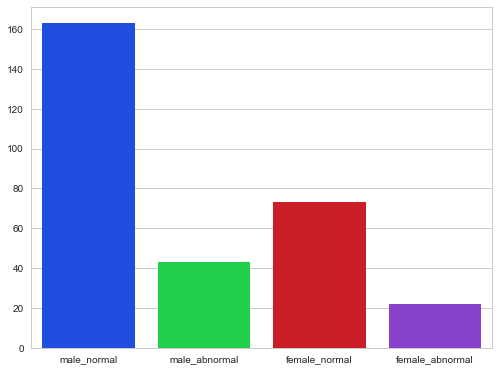

In [277]:
#plot for male and female (normal,abnormal)count.

sns.barplot(x=['male_normal','male_abnormal','female_normal','female_abnormal'],y=[len(male_normal),len(male_abnormal),len(female_normal),len(female_abnormal)])

*less number of males and females show abnormalities in bps*

In [278]:
#cholestrol(in mg/dl)
df.chol.value_counts()

234    6
204    6
197    6
269    5
212    5
254    5
226    4
243    4
240    4
239    4
233    4
177    4
282    4
211    4
219    3
230    3
283    3
263    3
245    3
288    3
199    3
258    3
256    3
236    3
246    3
231    3
220    3
303    3
229    3
274    3
      ..
326    1
340    1
215    1
341    1
342    1
353    1
354    1
360    1
394    1
407    1
306    1
305    1
300    1
293    1
217    1
224    1
237    1
241    1
242    1
409    1
252    1
257    1
259    1
262    1
276    1
278    1
281    1
284    1
290    1
564    1
Name: chol, Length: 152, dtype: int64

In [279]:
#To visualize and categorize normal and abnormal cholestrol among male and female,2-categories are made 
#according to medical- standards.
# chol<=200mg/dl is considered normal
# chol >200 mg/dl is considered as high(abnormal)
male_normal = df[(df.chol>126 )&(df.chol<=200)&(df.sex==1)]
female_normal = df[(df.chol>126 )&(df.chol<=200)&(df.sex==0)]
male_abnormal = df[(df.chol>201 )&(df.chol<=600)&(df.sex==1)]
female_abnormal = df[(df.chol>201 )&(df.chol<=600)&(df.sex==0)]
print("male_normal:",len(male_normal))
print('female_normal:',len(female_normal))
print('male_abnormal:',len(male_abnormal))
print('female_abnormal:',len(female_abnormal))
print('% of male not affected {:.2f}%'.format((len(male_normal)/male_count)*100))
print('% of female not affected {:.2f}%'.format((len(female_normal)/female_count)*100))
print('% of male affected {:.2f}%'.format((len(male_abnormal)/male_count)*100))
print('% of female affected {:.2f}%'.format((len(female_abnormal)/female_count)*100))

male_normal: 36
female_normal: 14
male_abnormal: 168
female_abnormal: 81
% of male not affected 17.39%
% of female not affected 14.58%
% of male affected 81.16%
% of female affected 84.38%


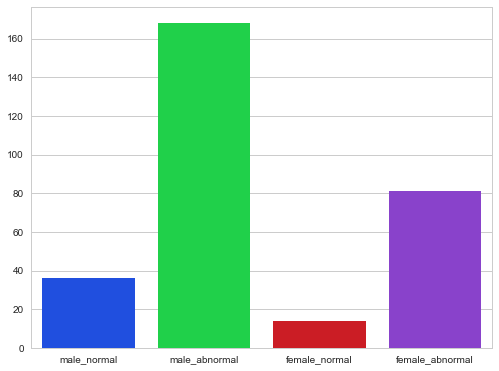

In [280]:
#visualizing
sns.barplot(x=['male_normal','male_abnormal','female_normal','female_abnormal'],y=[len(male_normal),len(male_abnormal),len(female_normal),len(female_abnormal)])

*cholestrol levels are not good in both males and females.*

In [281]:
#fasting blood-sugar
df.fbs.value_counts()

0    258
1     45
Name: fbs, dtype: int64

*fbs>120 -- 1, fbs<120 --0*

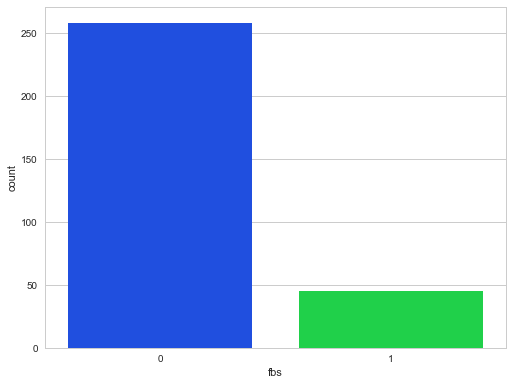

In [282]:
#plotting.
sns.countplot(x=df['fbs'])

*fbs levels are disturbed for 14.8% people*

In [283]:
df.restecg.value_counts()

1    152
0    147
2      4
Name: restecg, dtype: int64

*0 -- not having serious problems<br>*
*1 -- problem exists,but slightly<br>*
*2 -- bad condition of heart*

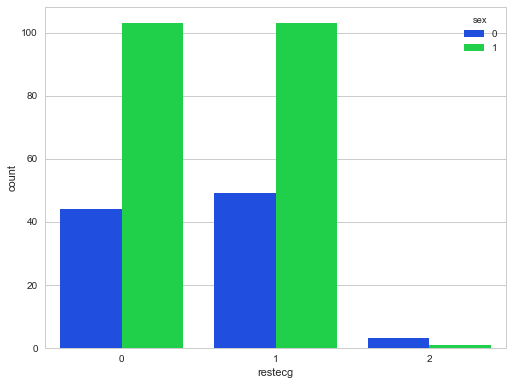

In [284]:
#plotting for both sex
sns.countplot(x=df['restecg'],hue=df['sex'])

*mostly people have either no problem or slight-problem.*

In [285]:
#maximum-heart-rate-achieve
df.thalach.value_counts()

162    11
160     9
163     9
173     8
152     8
125     7
132     7
150     7
172     7
143     7
144     7
156     6
169     6
158     6
140     6
142     6
178     5
161     5
154     5
165     5
168     5
174     5
170     5
182     5
179     5
157     5
147     5
145     4
131     4
130     4
       ..
181     2
180     2
106     1
97      1
99      1
113     1
95      1
90      1
88      1
117     1
202     1
118     1
177     1
194     1
192     1
190     1
188     1
187     1
185     1
184     1
167     1
121     1
195     1
137     1
134     1
129     1
128     1
127     1
124     1
71      1
Name: thalach, Length: 91, dtype: int64

In [286]:
#To visualize and categorize normal and abnormal cholestrol among male and female,2-categories are made 
#according to medical- standards.
# normal-thalach = 70-100
#abnormal-thalach = >100
male_normal = df[(df.thalach>71 )&(df.thalach<=100)&(df.sex==1)]
female_normal = df[(df.thalach>71 )&(df.thalach<=100)&(df.sex==0)]
male_abnormal = df[(df.thalach>101 )&(df.thalach<=202)&(df.sex==1)]
female_abnormal = df[(df.thalach>101 )&(df.thalach<=202)&(df.sex==0)]
print("male_normal:",len(male_normal))
print('female_normal:',len(female_normal))
print('male_abnormal:',len(male_abnormal))
print('female_abnormal:',len(female_abnormal))
print('% of male not affected {:.2f}%'.format((len(male_normal)/male_count)*100))
print('% of female not affected {:.2f}%'.format((len(female_normal)/female_count)*100))
print('% of male affected {:.2f}%'.format((len(male_abnormal)/male_count)*100))
print('% of female affected {:.2f}%'.format((len(female_abnormal)/female_count)*100))

male_normal: 5
female_normal: 2
male_abnormal: 201
female_abnormal: 94
% of male not affected 2.42%
% of female not affected 2.08%
% of male affected 97.10%
% of female affected 97.92%


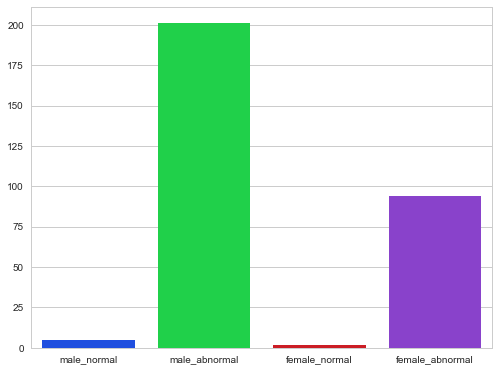

In [287]:
#visualizing
sns.barplot(x=['male_normal','male_abnormal','female_normal','female_abnormal'],y=[len(male_normal),len(male_abnormal),len(female_normal),len(female_abnormal)])

*Serious-alarm rings here as >97% both males and females have abnormal heart-rate*

In [288]:
#exercise induced anigna
df.exang.value_counts()


0    204
1     99
Name: exang, dtype: int64

*anigna is pain in chest<br>*
*0 -- no anigna<br>*
*1 --follows anigna*

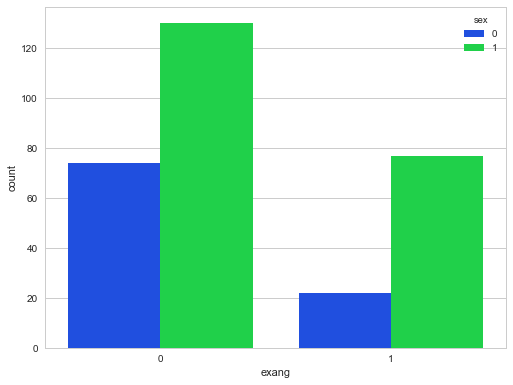

In [289]:
#visualizing for both.
sns.countplot(x=df['exang'],hue=df['sex'])

*males rarely observe anigna than females*

In [290]:
#no. of major vessels shown
df.ca.value_counts()

0    175
1     65
2     38
3     20
4      5
Name: ca, dtype: int64

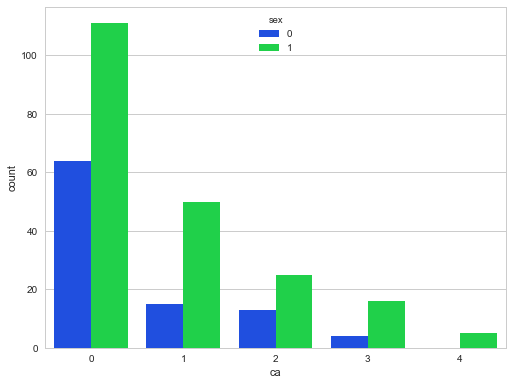

In [291]:
#plotting
sns.countplot(x=df['ca'],hue=df['sex'])

*vessels are more prominent in females*

### Preparing,Training,Testing of models###

In [292]:
#necessary modules
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn import svm
from sklearn.metrics import confusion_matrix,accuracy_score,roc_auc_score
from sklearn.model_selection import train_test_split

In [302]:
y = df.target.values
x = df.drop(['target'], axis = 1)

In [303]:
#splitting data into train and test data
X_train,X_test,Y_train,Y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [304]:
#LOGISTIC-REGRESSION
log = LogisticRegression()
log.fit(X_train,Y_train)
y_pred = log.predict(X_test)

In [305]:
log_ac = accuracy_score(Y_test,y_pred)
print('Accuracy: {:.2f}%'.format(log_ac*100))

Accuracy: 82.89%


In [306]:
#GAUSSIAN NAIVE-BAYES
gnb = GaussianNB()
gnb.fit(X_train,Y_train)
y_p = gnb.predict(X_test)
gnb_acc = accuracy_score(Y_test,y_p)
print('Accuracy: {:.2f}%'.format(gnb_acc*100))

Accuracy: 82.89%


In [307]:
#SVM(SUPPORT VECTOR MACHINE)
model = svm.SVC(kernel='linear',random_state=100)
model.fit(X_train,Y_train)
y_pp = model.predict(X_test)
svm_acc = accuracy_score(Y_test,y_pp)
print('Accuracy: {:.2f}%'.format(svm_acc*100))

Accuracy: 84.21%


In [308]:
#DECISION-TREES
dec_tree = DecisionTreeClassifier(random_state=0)
dec_tree.fit(X_train, Y_train)
y_predict = dec_tree.predict(X_test)
dec_tree_acc = accuracy_score(Y_test,y_predict)
print('Accuracy: {:.2f}%'.format(dec_tree_acc*100))

Accuracy: 78.95%


In [309]:
#RANDOM-FOREST
from sklearn.ensemble import RandomForestClassifier
rf = RandomForestClassifier(n_estimators = 1000, random_state = 1)
rf.fit(X_train, Y_train)
random_forest_acc = rf.score(X_test,Y_test)
print('Accuracy: {:.2f}%'.format(random_forest_acc*100))


Accuracy: 84.21%


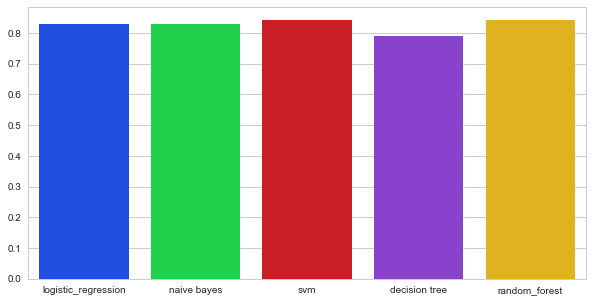

In [310]:
#compairing and plotting
plt.figure(figsize=(10,5))
sns.set(palette='bright')
sns.set_style('whitegrid')
sns.barplot(x=['logistic_regression','naive bayes','svm','decision tree','random_forest'],y=[log_ac,gnb_acc,svm_acc,dec_tree_acc,random_forest_acc])

**By comparing and visualizing it is clear that Random-forest works best for modelling and accuracy of our model is 84.6%**<br>
**While determining a person is having a heart disease or not their age-group,cholestrol,heart-rate(thalach),gender<br> plays vital role in predicting the disease.<br>
Random-Forest model prepared will tell us 84.6% accurately.So,there are 15.4% of chances of wrong-prediction**